<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

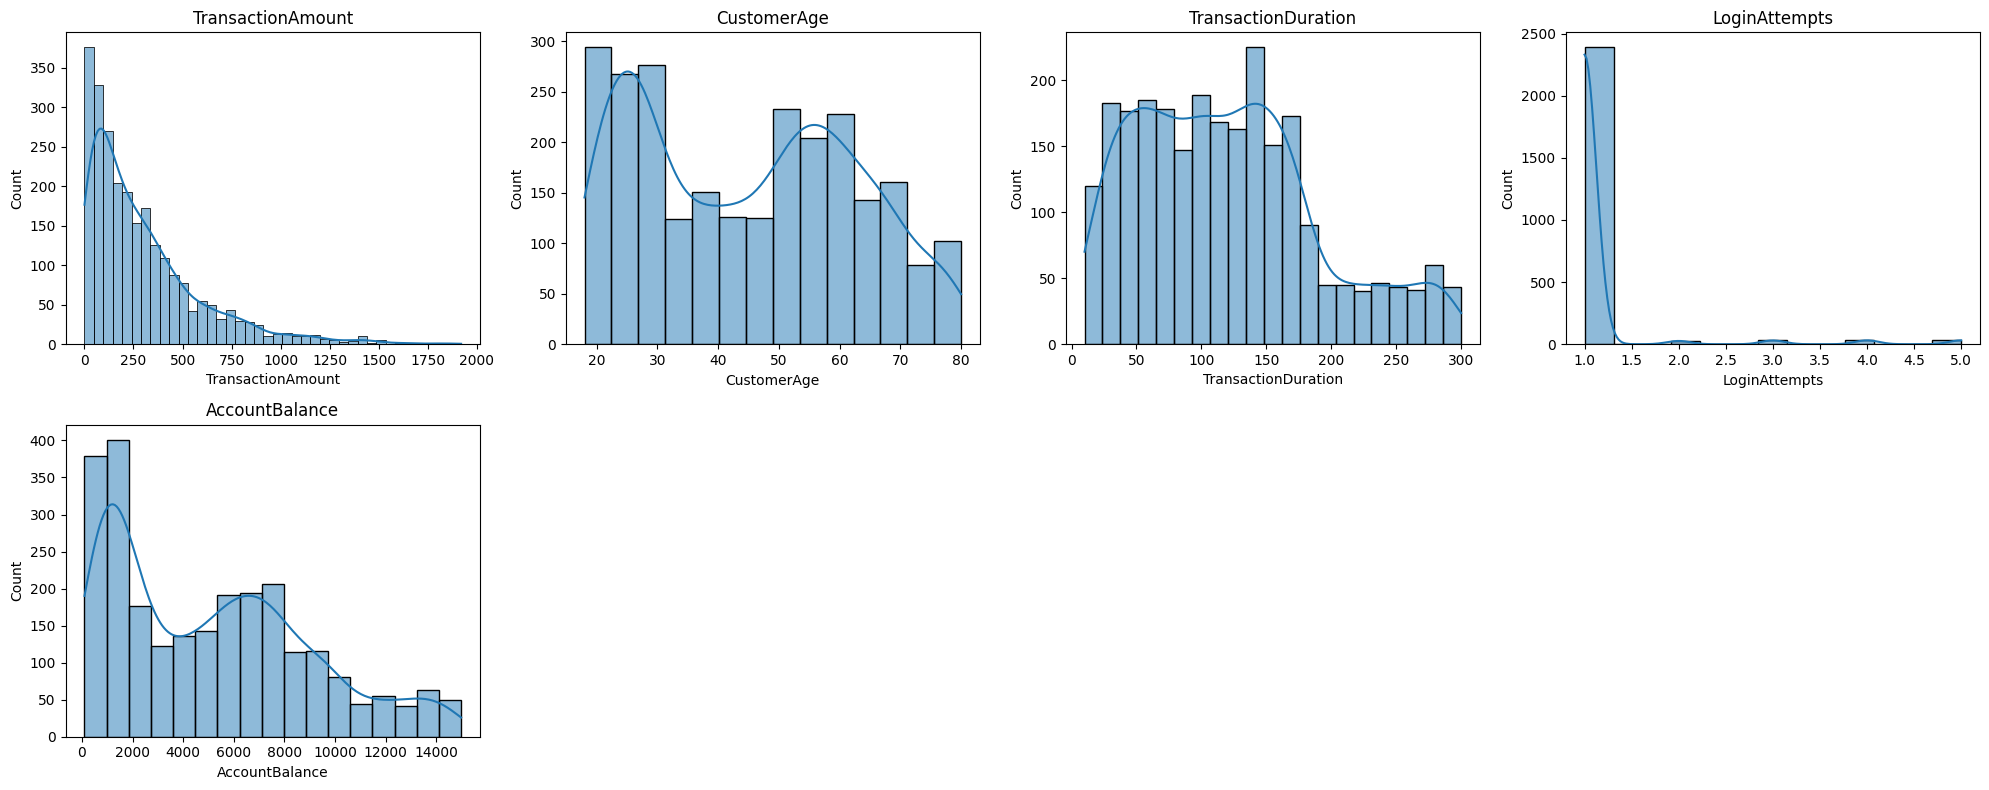

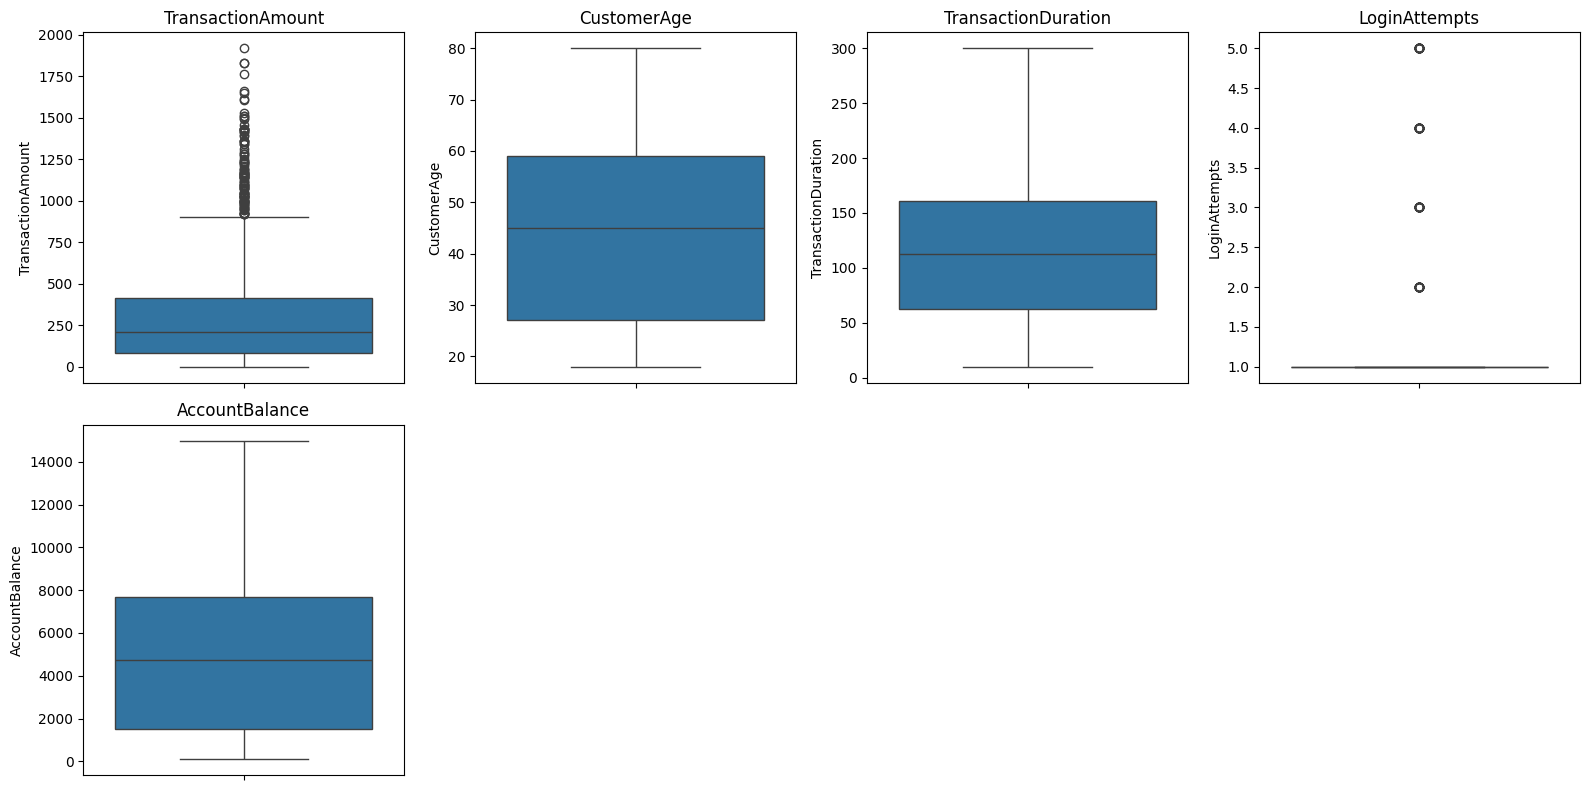

C:\Users\Reina_Chi\AppData\Local\Temp\ipykernel_3996\1885472979.py:105: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_loc.set_xticklabels(ax_loc.get_xticklabels(), ha='right')


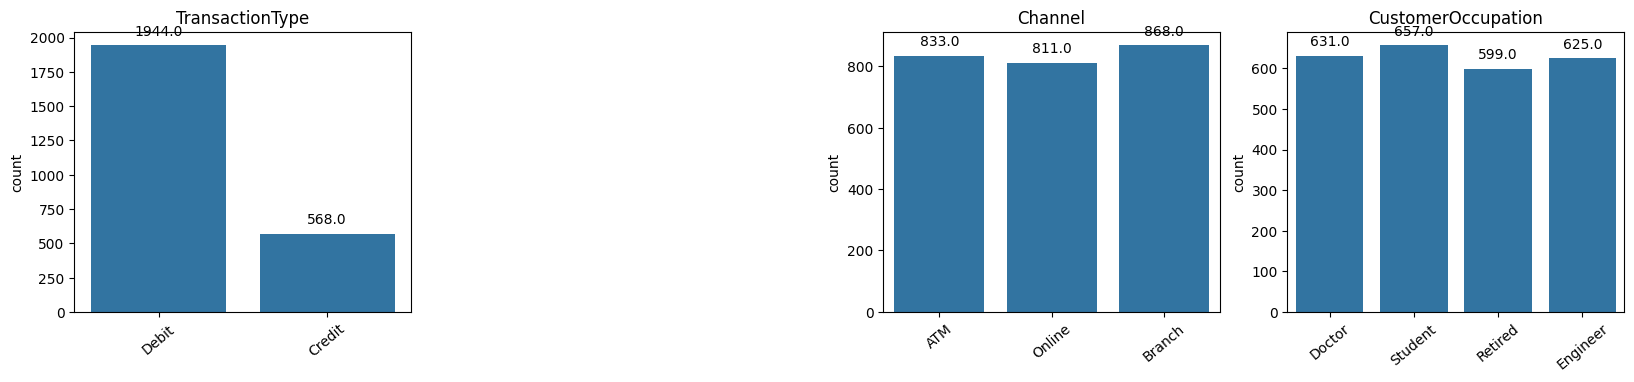

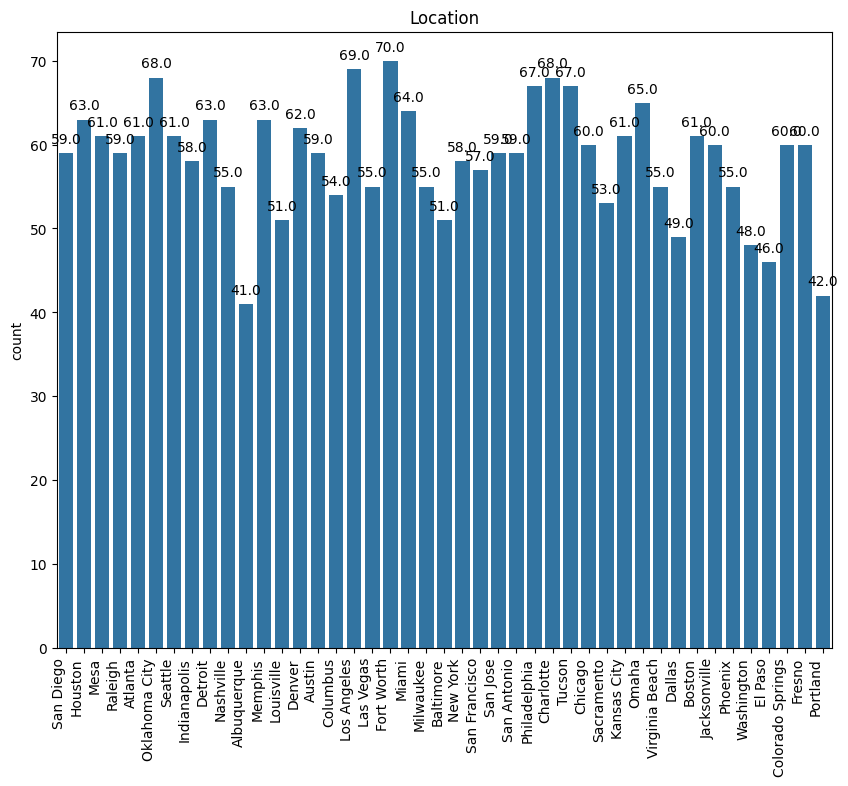

<Figure size 640x480 with 0 Axes>

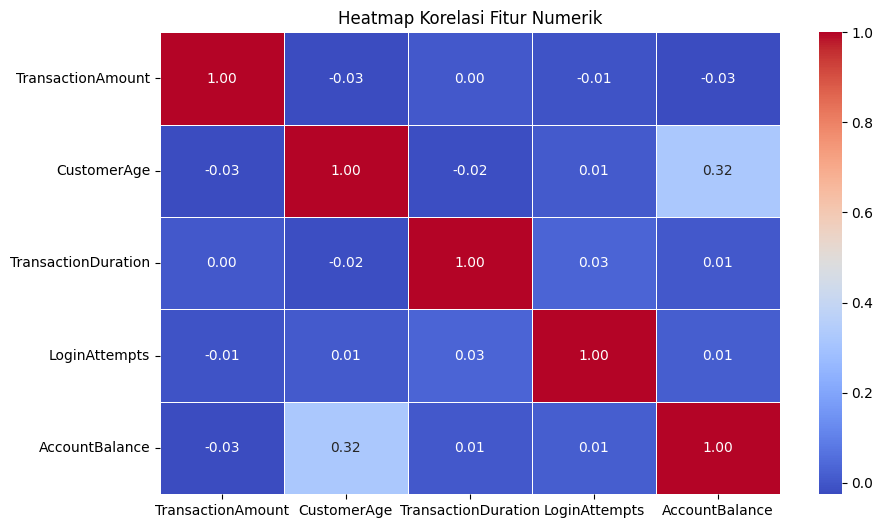

TransactionType : 2
Location : 43
Channel : 3
CustomerOccupation : 4
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

   TransactionType DeviceID      IP Address MerchantID  CustomerAge  \
0                1  D000380  162.198.218.92       M015           70   
1                1  D000051     13.149.61.4       M052           68   
2                1  D000235  215.97.143.157       M009           19   
3                1  D000187  200.13.225.150       M002           26   
4                0  D000308    65.164.3.100       M091           26   

   TransactionDuration  ...  Location_San Jose  Location_Seattle  \
0                   8

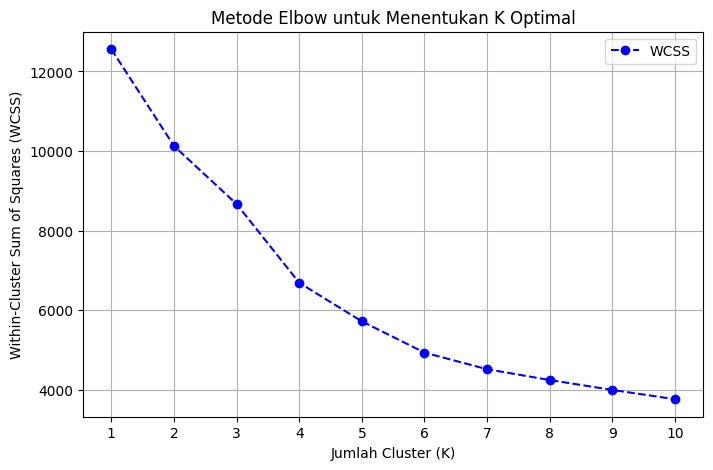

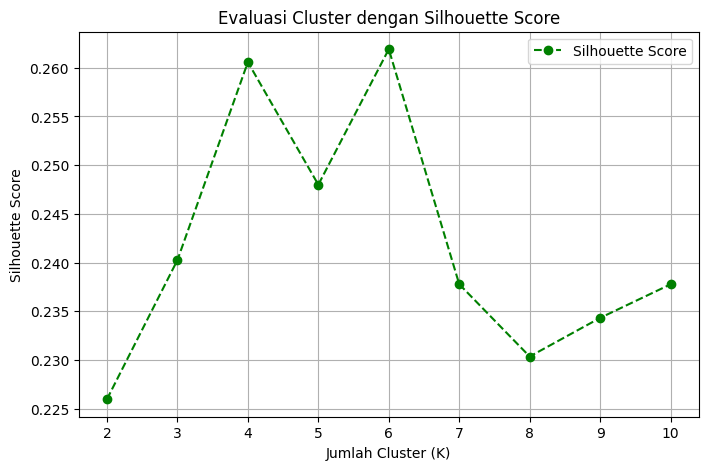

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load dataset
file_path = "https://raw.githubusercontent.com/SoraIroShiro/submission_basic_ML/refs/heads/main/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
# mengecek isi data
print(df.info())
print(df.describe())

# Menentukan kolom numerik dan kategorikal
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Menghapus kolom identifikasi dari daftar kategorikal
excluded_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate', 'TransactionDate']
categorical_columns = [col for col in categorical_columns if col not in excluded_columns]

numerical_columns, categorical_columns

# Menentukan jumlah kolom dan baris
num_cols = len(numerical_columns)
cols_per_row = 4
rows = -(-num_cols // cols_per_row)  # Ceiling division tanpa np.ceil

# Membuat subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()

# Plot histogram untuk setiap kolom numerik
for idx, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[idx])
    axes[idx].set_title(column)

# Menonaktifkan subplot kosong yang tersisa
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()

# Menentukan jumlah kolom dan baris untuk tampilan grid (4 kolom per baris)
cols_per_row = 4
rows = -(-len(numerical_columns) // cols_per_row)  # Ceiling division

# Membuat subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(4 * cols_per_row, 4 * rows))
axes = axes.flatten()

# Plot boxplot untuk setiap kolom numerik
for idx, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[idx])
    axes[idx].set_title(column)

# Menonaktifkan subplot kosong yang tidak terpakai
for empty_idx in range(idx + 1, len(axes)):
    fig.delaxes(axes[empty_idx])

plt.tight_layout()
plt.show()

# Menghitung jumlah baris untuk tampilan grid
additional_row = 1 if "Location" in categorical_columns else 0
rows = -(-len(categorical_columns) // cols_per_row) + additional_row  # Tambah baris ekstra untuk Location

# Membuat subplots dengan ukuran yang lebih luas
fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
axes = axes.flatten()

location_ax = None  # Untuk menyimpan subplot khusus Location

# Plot countplot untuk setiap kolom kategorikal
for idx, column in enumerate(categorical_columns):
    if column == "Location":
        continue  # Skip Location, akan ditampilkan di subplot besar

    sns.countplot(data=df, x=column, ax=axes[idx])
    axes[idx].tick_params(axis='x', rotation=40)
    axes[idx].set_xlabel('')
    axes[idx].set_title(column)

    # Menambahkan anotasi jumlah data pada setiap kategori
    for p in axes[idx].patches:
        axes[idx].annotate(f'{p.get_height()}', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', 
                           xytext=(0, 5), textcoords='offset points')

# Tambahkan subplot baru untuk Location dengan ukuran lebih besar (2x2 ukuran subplot biasa)
fig_loc, ax_loc = plt.subplots(figsize=(10, 8))
sns.countplot(data=df, x="Location", ax=ax_loc)
ax_loc.tick_params(axis='x', rotation=90)
ax_loc.set_xlabel('')
ax_loc.set_title("Location")
ax_loc.set_xticklabels(ax_loc.get_xticklabels(), ha='right')

# Tambahkan anotasi jumlah data
for p in ax_loc.patches:
    ax_loc.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points')
    
# Menonaktifkan subplot kosong yang tidak terpakai
for ax in axes:
    if len(ax.patches) == 0:  # Jika subplot tidak memiliki data (tidak ada batang pada countplot)
        fig.delaxes(ax)

plt.show()

plt.tight_layout()
plt.show()

# Membuat heatmap untuk korelasi antara fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# Menampilkan jumlah kategori unik di setiap kolom kategorikal
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f'{col} : {unique_count}')


# Menentukan kolom kategorikal
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Label Encoding untuk TransactionType (biner)
le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])

# One-Hot Encoding untuk kolom lainnya
df = pd.get_dummies(df, columns=['Location', 'Channel', 'CustomerOccupation'], drop_first=True)

# Menampilkan hasil
print(df.head())

# Menampilkan jumlah nilai kosong (missing values) di setiap kolom
missing_values = df.isnull().sum()
print(missing_values)


# Menampilkan hasil
df.describe()

# Normalisasi data sebelum diterapkan ke K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Gunakan dataset yang sudah dibersihkan

# Menghitung Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah cluster
wcss_scores = []  # Menyimpan hasil inertia untuk setiap K

for num_clusters in range(1, 11):  # Coba K dari 1 sampai 10
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss_scores.append(kmeans.inertia_)  # Simpan inertia dari model

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_scores, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)
plt.show()

# Normalisasi dataset sebelum clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])  # Gunakan dataset yang telah diproses

# Menyimpan nilai silhouette untuk berbagai jumlah cluster (K)
silhouette_scores = []
K_range = range(2, 11)  # Mulai dari 2 karena silhouette tidak valid untuk K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g', label="Silhouette Score")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Cluster dengan Silhouette Score")
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()

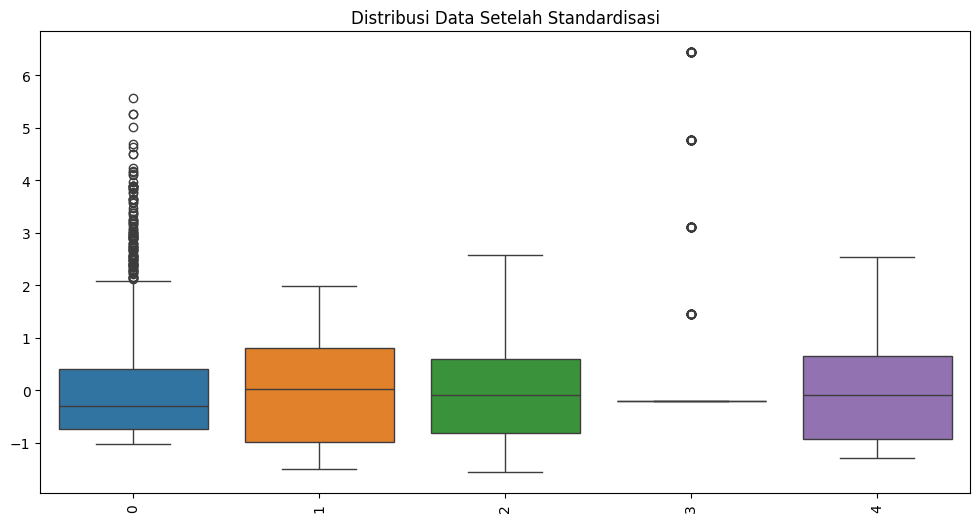

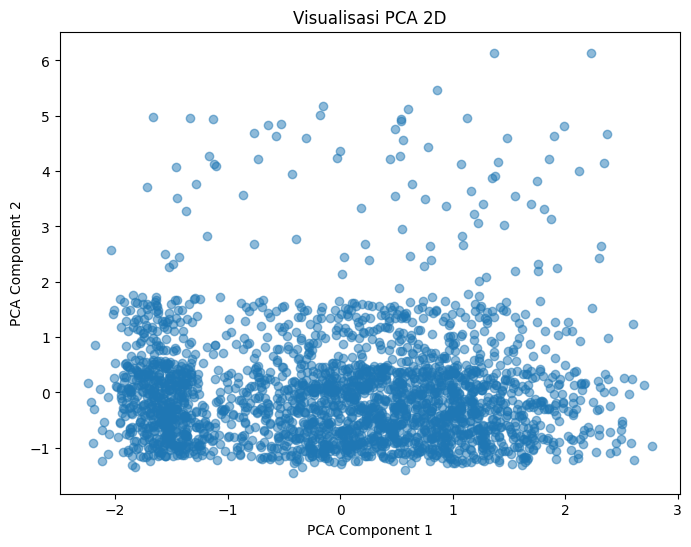

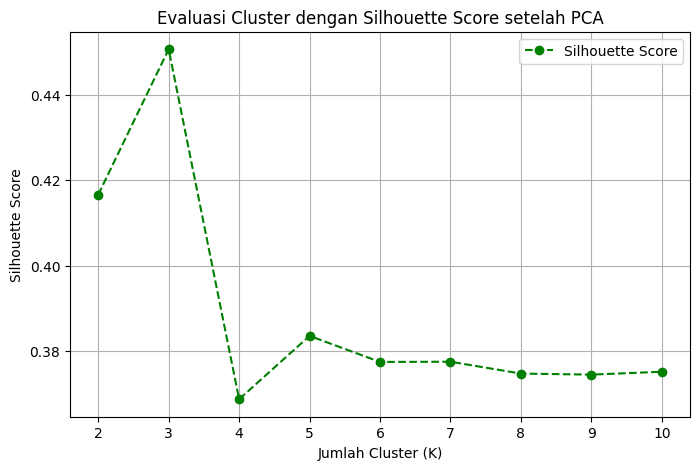

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load dataset
file_path = "https://raw.githubusercontent.com/SoraIroShiro/submission_basic_ML/refs/heads/main/bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

# Menentukan kolom numerik
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Cek distribusi data setelah standarisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)
plt.title("Distribusi Data Setelah Standardisasi")
plt.show()

# Reduksi Dimensi dengan PCA (Ambil 2 Komponen Utama)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualisasi PCA 2D")
plt.show()

# Menghitung silhouette score setelah PCA
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette Score setelah PCA
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g', label="Silhouette Score")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Evaluasi Cluster dengan Silhouette Score setelah PCA")
plt.xticks(K_range)
plt.legend()
plt.grid(True)
plt.show()
